In [1]:
from google.colab import files
uploaded = files.upload()

Saving HeartDiseaseTrain-Test.csv to HeartDiseaseTrain-Test.csv


In [2]:
import pandas as pd

df = pd.read_csv(list(uploaded.keys())[0])

df.head() # first few rows

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [3]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [5]:
df.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_blood_pressure,0
cholestoral,0
fasting_blood_sugar,0
rest_ecg,0
Max_heart_rate,0
exercise_induced_angina,0
oldpeak,0


In [6]:
# Checking for unique values in categorical columns
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']

for col in categorical_cols:
  print(f"Column: {col}, Unique values: {df[col].unique()}\n")

Column: sex, Unique values: ['Male' 'Female']

Column: chest_pain_type, Unique values: ['Typical angina' 'Atypical angina' 'Non-anginal pain' 'Asymptomatic']

Column: fasting_blood_sugar, Unique values: ['Lower than 120 mg/ml' 'Greater than 120 mg/ml']

Column: rest_ecg, Unique values: ['ST-T wave abnormality' 'Normal' 'Left ventricular hypertrophy']

Column: exercise_induced_angina, Unique values: ['No' 'Yes']

Column: slope, Unique values: ['Downsloping' 'Upsloping' 'Flat']

Column: vessels_colored_by_flourosopy, Unique values: ['Two' 'Zero' 'One' 'Three' 'Four']

Column: thalassemia, Unique values: ['Reversable Defect' 'Fixed Defect' 'Normal' 'No']



In [7]:
# Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
  df[col] = le.fit_transform(df[col])

In [8]:
# Normalizing the non-categorical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

non_categorical_cols = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']

for cols in non_categorical_cols:
  df[cols] = scaler.fit_transform(df[[cols]])

In [11]:
df.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,-0.268437,1,3,-0.377636,-0.659332,1,2,0.821321,0,-0.060888,0,3,3,0
1,-0.158157,1,3,0.479107,-0.833861,0,1,0.255968,1,1.727137,2,4,3,0
2,1.716595,1,3,0.764688,-1.396233,1,2,-1.048692,1,1.301417,2,4,3,0
3,0.724079,1,3,0.936037,-0.833861,1,2,0.516900,0,-0.912329,0,1,3,0
4,0.834359,0,3,0.364875,0.930822,0,2,-1.874977,0,0.705408,1,2,0,0
5,0.393241,0,3,-1.805540,0.038784,1,1,-1.179158,0,-0.060888,1,4,0,1
6,0.393241,1,3,-1.005914,1.396233,1,0,-0.396362,0,2.834010,2,2,2,0
7,0.062402,1,3,1.621431,0.833861,1,1,-0.178919,1,-0.231177,1,1,3,0
8,-0.930114,1,3,-0.663216,0.058176,1,1,-0.222407,0,-0.231177,0,4,3,0
9,-0.047877,1,3,-0.548984,0.775685,1,1,-1.440090,1,1.812281,1,3,0,0


In [12]:
df.corr()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
age,1.000000,-0.103240,0.107819,0.271121,0.219823,-0.121243,-0.183544,-0.390227,0.088163,0.208137,0.169105,-0.249618,0.126605,-0.229324
sex,-0.103240,1.000000,0.007902,-0.078974,-0.198258,-0.027200,0.022421,-0.049365,0.139157,0.084687,0.026666,-0.149389,0.360626,-0.279501
chest_pain_type,0.107819,0.007902,1.000000,-0.032418,0.070620,0.023624,-0.091537,-0.350566,0.400109,0.225154,0.159604,-0.164167,0.266997,-0.416055
resting_blood_pressure,0.271121,-0.078974,-0.032418,1.000000,0.127977,-0.181767,-0.165990,-0.039264,0.061197,0.187434,0.120445,0.001904,0.133468,-0.138772
cholestoral,0.219823,-0.198258,0.070620,0.127977,1.000000,-0.026917,-0.179569,-0.021772,0.067382,0.064880,0.014248,-0.033616,0.034016,-0.099966
fasting_blood_sugar,-0.121243,-0.027200,0.023624,-0.181767,-0.026917,1.000000,0.069112,0.008866,-0.049261,-0.010859,-0.061902,0.053893,-0.064965,0.041164
rest_ecg,-0.183544,0.022421,-0.091537,-0.165990,-0.179569,0.069112,1.000000,0.130444,-0.100127,-0.174719,-0.173741,0.089347,-0.029673,0.186374
Max_heart_rate,-0.390227,-0.049365,-0.350566,-0.039264,-0.021772,0.008866,0.130444,1.000000,-0.380281,-0.349796,-0.395308,0.248927,-0.265943,0.422895
exercise_induced_angina,0.088163,0.139157,0.400109,0.061197,0.067382,-0.049261,-0.100127,-0.380281,1.000000,0.310844,0.267335,-0.156527,0.324087,-0.438029
oldpeak,0.208137,0.084687,0.225154,0.187434,0.064880,-0.010859,-0.174719,-0.349796,0.310844,1.000000,0.575189,-0.073133,0.336795,-0.438441


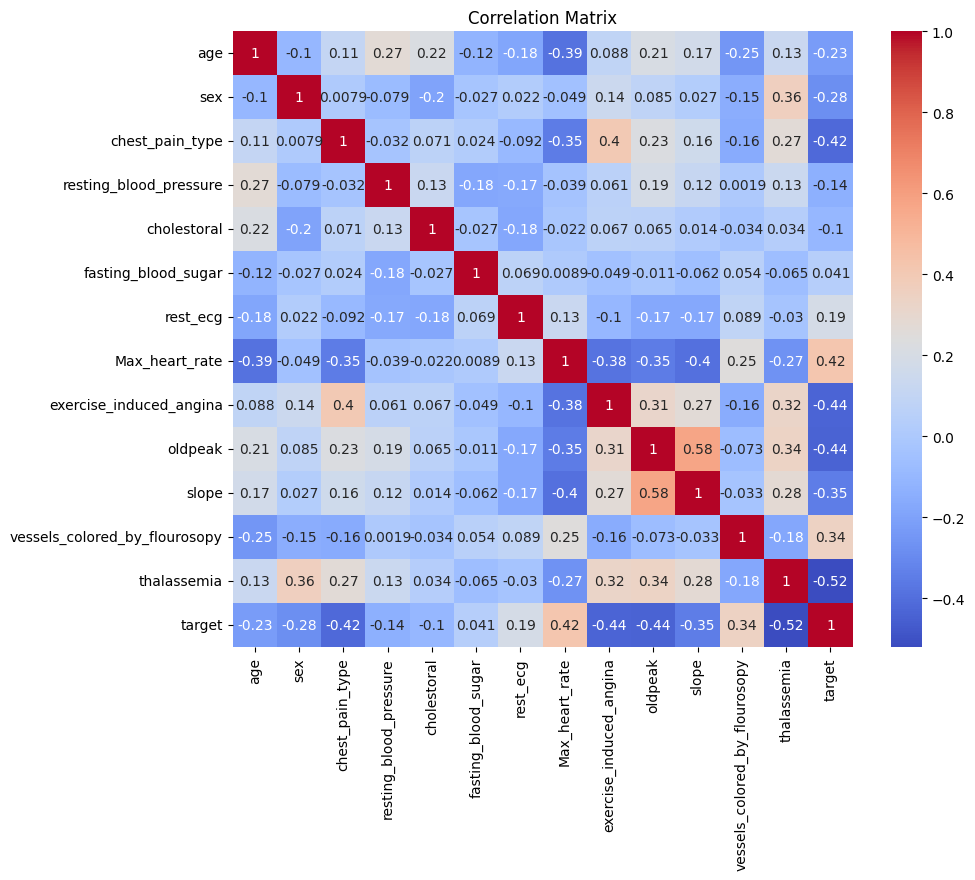

In [13]:
# correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Detecting outliers
def detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  Lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[column] < Lower_bound) | (df[column] > upper_bound)]
  num_outliers = outliers.shape[0]

  print(f"Number of outliers in {column}: {num_outliers}")

  return outliers

for col in non_categorical_cols:
  outliers = detect_outliers(df, col)

Number of outliers in age: 0
Number of outliers in resting_blood_pressure: 45
Number of outliers in cholestoral: 16
Number of outliers in Max_heart_rate: 4
Number of outliers in oldpeak: 7


In [15]:
print(f"Shape before removing outliers: {df.shape}")

# Remove outliers
def remove_outliers(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  print(f"Outliers removed from {column}")

  return df_cleaned

col_with_outliers = ['resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']

df_cleaned = df.copy()

for col in col_with_outliers:
  df_cleaned = remove_outliers(df_cleaned, col)

print(f"Shape after removing outliers: {df_cleaned.shape}")

Shape before removing outliers: (1025, 14)
Outliers removed from resting_blood_pressure
Outliers removed from cholestoral
Outliers removed from Max_heart_rate
Outliers removed from oldpeak
Shape after removing outliers: (946, 14)


In [16]:
# Verify if the outliers have been removed
def verify_outliers_removed(df_cleaned, column):
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    Lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_remaining = df_cleaned[(df_cleaned[column] < Lower_bound) | (df_cleaned[column] > upper_bound)]
    num_outliers_remaining = outliers_remaining.shape[0]

    print(f"Number of remaining outliers in {column}: {num_outliers_remaining}")

    return outliers_remaining

for col in non_categorical_cols:
    remaining_outliers = verify_outliers_removed(df_cleaned, col)

Number of remaining outliers in age: 0
Number of remaining outliers in resting_blood_pressure: 0
Number of remaining outliers in cholestoral: 0
Number of remaining outliers in Max_heart_rate: 0
Number of remaining outliers in oldpeak: 0


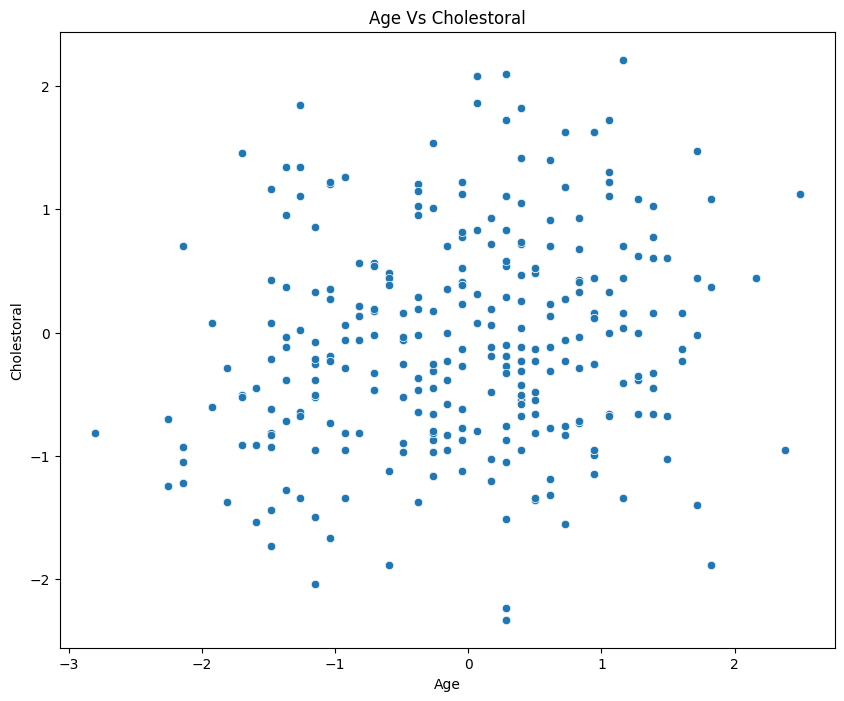

In [17]:
# visualizing age & cholestrol

df_sorted = df_cleaned.sort_values(by='age')

plt.figure(figsize=(10,8))
sns.scatterplot(x='age', y='cholestoral', data = df_sorted)
plt.title('Age Vs Cholestoral')
plt.xlabel('Age')
plt.ylabel('Cholestoral')
plt.show()

In [18]:
# check for data imabalance
df_cleaned['target'].value_counts()

,count
target,
1,504
0,442


In [19]:
# Checking the percentage distribution of the target variable
class_distribution = df_cleaned['target'].value_counts(normalize=True) * 100
print(class_distribution)

target
1    53.276956
0    46.723044
Name: proportion, dtype: float64


In [20]:
# Check for multi-collinearity via Variace Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df_cleaned.drop('target', axis = 1)) # add a constant to the dataset for the intercept

# Calculating VIF for each feature
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                         Features        VIF
0                           const  35.996228
1                             age   1.433802
2                             sex   1.297883
3                 chest_pain_type   1.303565
4          resting_blood_pressure   1.112959
5                     cholestoral   1.086139
6             fasting_blood_sugar   1.045249
7                        rest_ecg   1.084685
8                  Max_heart_rate   1.698208
9         exercise_induced_angina   1.442578
10                        oldpeak   1.556225
11                          slope   1.511733
12  vessels_colored_by_flourosopy   1.194394
13                    thalassemia   1.481439


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Splitting the features and target
X = df_cleaned.drop('target', axis = 1)
y = df_cleaned['target']

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
s = StandardScaler()
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test)

# Initialize the model
model = LogisticRegression()

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


Accuracy: 0.8473684210526315
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        97
           1       0.82      0.88      0.85        93

    accuracy                           0.85       190
   macro avg       0.85      0.85      0.85       190
weighted avg       0.85      0.85      0.85       190



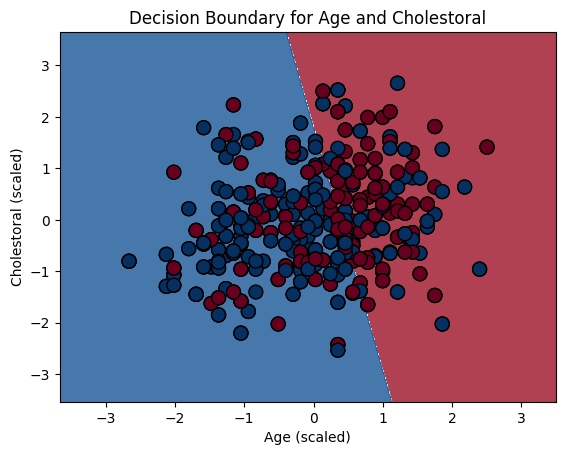

In [25]:
import numpy as np

# Just two features for visualization
X = df_cleaned[['age', 'cholestoral']].values
y = df_cleaned['target'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Mesh grid for plotting decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k', marker='o', s=100, cmap=plt.cm.RdBu)
plt.title('Decision Boundary for Age and Cholestoral')
plt.xlabel('Age (scaled)')
plt.ylabel('Cholestoral (scaled)')
plt.show()